In [ ]:
path = '/content/Hypertension-risk-model-main.csv'
import pandas as pd
df=pd.read_csv(path)
df.head()

,male,age,currentSmoker,cigsPerDay,BPMeds,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,Risk
0,1,39,0,0.0,0.0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0.0,0.0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,20.0,0.0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,30.0,0.0,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,23.0,0.0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [ ]:
def detect_outliers_iqr(df):
    outliers = {}
    for column in df.columns:
        if df[column].dtype != 'object':
            Q1 = df[column].quantile(0.25)
            Q3 = df[column].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            column_outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
            outliers[column] = column_outliers
    return outliers

outliers_iqr = detect_outliers_iqr(df)

for column, outliers in outliers_iqr.items():
    print(column,outliers)
    print('-'*100)



male Empty DataFrame
Columns: [male, age, currentSmoker, cigsPerDay, BPMeds, diabetes, totChol, sysBP, diaBP, BMI, heartRate, glucose, Risk]
Index: []
----------------------------------------------------------------------------------------------------
age Empty DataFrame
Columns: [male, age, currentSmoker, cigsPerDay, BPMeds, diabetes, totChol, sysBP, diaBP, BMI, heartRate, glucose, Risk]
Index: []
----------------------------------------------------------------------------------------------------
currentSmoker Empty DataFrame
Columns: [male, age, currentSmoker, cigsPerDay, BPMeds, diabetes, totChol, sysBP, diaBP, BMI, heartRate, glucose, Risk]
Index: []
----------------------------------------------------------------------------------------------------
cigsPerDay       male  age  currentSmoker  cigsPerDay  BPMeds  diabetes  totChol  sysBP  \
327      1   56              1        60.0     0.0         0    246.0  125.0   
721      1   59              1        60.0     0.0         0    2

In [ ]:
def remove_outliers_iqr(df):
    clean_df = df.copy()
    for column in df.columns:
        if df[column].dtype != 'object':
            Q1 = df[column].quantile(0.25)
            Q3 = df[column].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            clean_df = clean_df[(clean_df[column] >= lower_bound) & (clean_df[column] <= upper_bound)]
    return clean_df

clean_df = remove_outliers_iqr(df)
print(clean_df)


      male  age  currentSmoker  cigsPerDay  BPMeds  diabetes  totChol  sysBP  \
0        1   39              0         0.0     0.0         0    195.0  106.0   
1        0   46              0         0.0     0.0         0    250.0  121.0   
2        1   48              1        20.0     0.0         0    245.0  127.5   
3        0   61              1        30.0     0.0         0    225.0  150.0   
4        0   46              1        23.0     0.0         0    285.0  130.0   
...    ...  ...            ...         ...     ...       ...      ...    ...   
4233     1   50              1         1.0     0.0         0    313.0  179.0   
4234     1   51              1        43.0     0.0         0    207.0  126.5   
4237     0   52              0         0.0     0.0         0    269.0  133.5   
4238     1   40              0         0.0     0.0         0    185.0  141.0   
4239     0   39              1        30.0     0.0         0    196.0  133.0   

      diaBP    BMI  heartRate  glucose 

In [ ]:
clean_df

,male,age,currentSmoker,cigsPerDay,BPMeds,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,Risk
0,1,39,0,0.0,0.0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0.0,0.0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,20.0,0.0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,30.0,0.0,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,23.0,0.0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1,1.0,0.0,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,1,43.0,0.0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4237,0,52,0,0.0,0.0,0,269.0,133.5,83.0,21.47,80.0,107.0,0
4238,1,40,0,0.0,0.0,0,185.0,141.0,98.0,25.60,67.0,72.0,1


<Axes: xlabel='sysBP', ylabel='diaBP'>

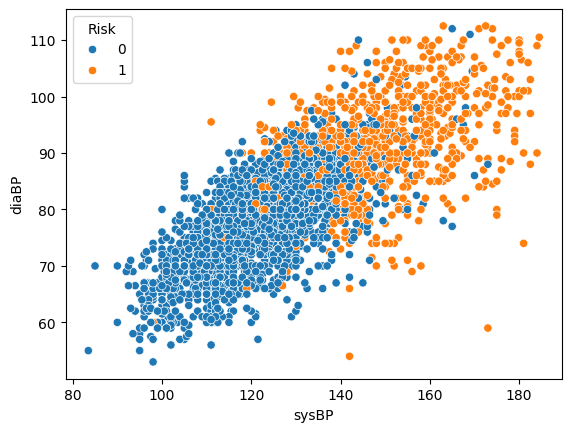

In [ ]:
import seaborn as sns
sns.scatterplot(x='sysBP',y='diaBP',hue='Risk',data=clean_df)

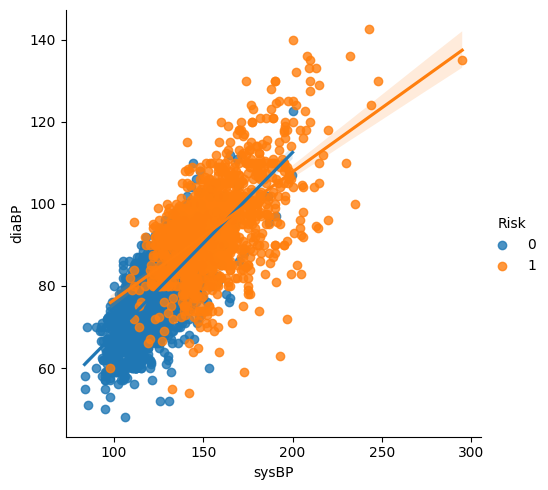

In [ ]:
sns.lmplot(x='sysBP',y='diaBP',hue='Risk',data=df)

In [ ]:
df.shape

(4240, 13)

In [ ]:
clean_df.shape

(3198, 13)

<Axes: >

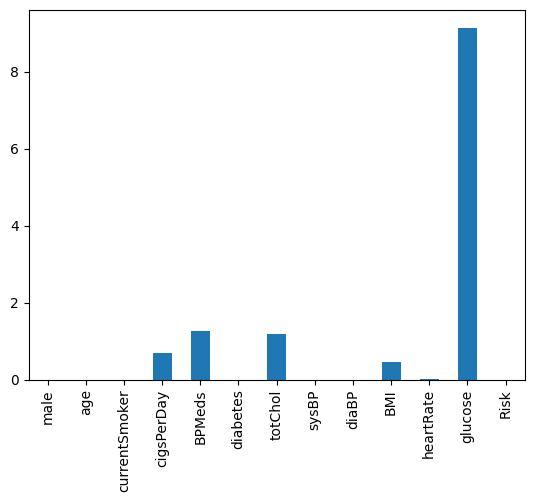

In [ ]:
(100*df.isna().sum()/len(df)).plot.bar()

In [ ]:
df = clean_df
df.dropna(axis=0,inplace=True)


In [ ]:
df.isna().sum().sum()

0

outlier,undersampling


In [ ]:
df.head()

,male,age,currentSmoker,cigsPerDay,BPMeds,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,Risk
0,1,39,0,0.0,0.0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0.0,0.0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,20.0,0.0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,30.0,0.0,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,23.0,0.0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [ ]:
df['Risk'].value_counts(normalize=True)

Risk
0    0.750782
1    0.249218
Name: proportion, dtype: float64

In [ ]:
from sklearn.utils import resample
majority_class = df[df['Risk'] == 0]
minority_class = df[df['Risk'] == 1]
undersampled_majority = resample(majority_class,replace=False,n_samples=len(minority_class),random_state=42)
balanced_df = pd.concat([undersampled_majority, minority_class])
balanced_df = balanced_df.sample(frac=1, random_state=42).reset_index(drop=True)
print(balanced_df['Risk'].value_counts(normalize=True))


Risk
1    0.5
0    0.5
Name: proportion, dtype: float64


In [ ]:
balanced_df

,male,age,currentSmoker,cigsPerDay,BPMeds,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,Risk
0,0,64,0,0.0,0.0,0,300.0,144.0,80.0,25.81,75.0,102.0,1
1,1,49,1,40.0,0.0,0,260.0,142.0,54.0,25.40,67.0,95.0,1
2,1,55,1,5.0,0.0,0,240.0,135.0,95.0,28.69,75.0,108.0,1
3,1,53,0,0.0,0.0,0,202.0,119.0,80.0,23.98,64.0,78.0,0
4,1,49,1,15.0,0.0,0,309.0,145.0,92.0,32.13,60.0,73.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1589,0,41,0,0.0,0.0,0,235.0,158.0,93.0,22.18,78.0,70.0,1
1590,0,48,0,0.0,0.0,0,275.0,177.0,101.0,25.22,75.0,82.0,1
1591,1,51,1,30.0,0.0,0,230.0,171.0,112.0,25.08,95.0,88.0,1
1592,1,63,1,15.0,0.0,0,207.0,165.0,100.0,21.33,72.0,77.0,1


In [ ]:
df.corr()[['Risk']]

,Risk
male,0.003588
age,0.305292
currentSmoker,-0.105258
cigsPerDay,-0.067470
BPMeds,0.262955
diabetes,0.082030
totChol,0.164645
sysBP,0.697849
diaBP,0.616753
BMI,0.303411


In [ ]:
pd.crosstab(df['male'],df['Risk'])

Risk,0,1
male,,
0,1435,646
1,1146,524


In [ ]:
df.groupby(['male'])['Risk'].mean()

male
0    0.310428
1    0.313772
Name: Risk, dtype: float64

In [ ]:
summary = pd.crosstab(df['male'],df['Risk'])

In [ ]:
from scipy.stats import chi2_contingency

#H0: no effect  correct
#H1: effect
chi2_contingency(summary)[1]

0.8537765213373445

In [ ]:
df['age'].describe()

count    3751.000000
mean       49.573447
std         8.570204
min        32.000000
25%        42.000000
50%        49.000000
75%        56.000000
max        70.000000
Name: age, dtype: float64

In [ ]:
df['age_cat'] = pd.cut(df['age'],bins=[30,40,50,60,70],labels=['30-40','40-50','50-60','60-70'])

In [ ]:
df

,male,age,currentSmoker,cigsPerDay,BPMeds,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,Risk,age_cat
0,1,39,0,0.0,0.0,0,195.0,106.0,70.0,26.97,80.0,77.0,0,30-40
1,0,46,0,0.0,0.0,0,250.0,121.0,81.0,28.73,95.0,76.0,0,40-50
2,1,48,1,20.0,0.0,0,245.0,127.5,80.0,25.34,75.0,70.0,0,40-50
3,0,61,1,30.0,0.0,0,225.0,150.0,95.0,28.58,65.0,103.0,1,60-70
4,0,46,1,23.0,0.0,0,285.0,130.0,84.0,23.10,85.0,85.0,0,40-50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1,1.0,0.0,0,313.0,179.0,92.0,25.97,66.0,86.0,1,40-50
4234,1,51,1,43.0,0.0,0,207.0,126.5,80.0,19.71,65.0,68.0,0,50-60
4237,0,52,0,0.0,0.0,0,269.0,133.5,83.0,21.47,80.0,107.0,0,50-60
4238,1,40,0,0.0,0.0,0,185.0,141.0,98.0,25.60,67.0,72.0,1,30-40


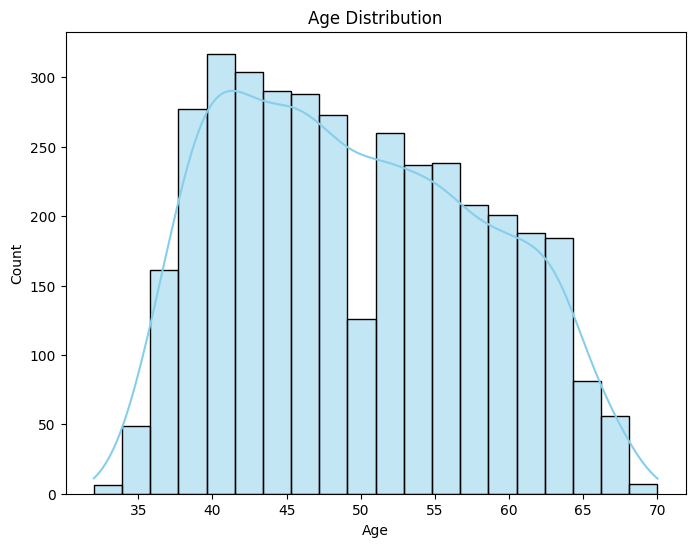

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.histplot(df['age'], bins=20, kde=True, color='skyblue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()


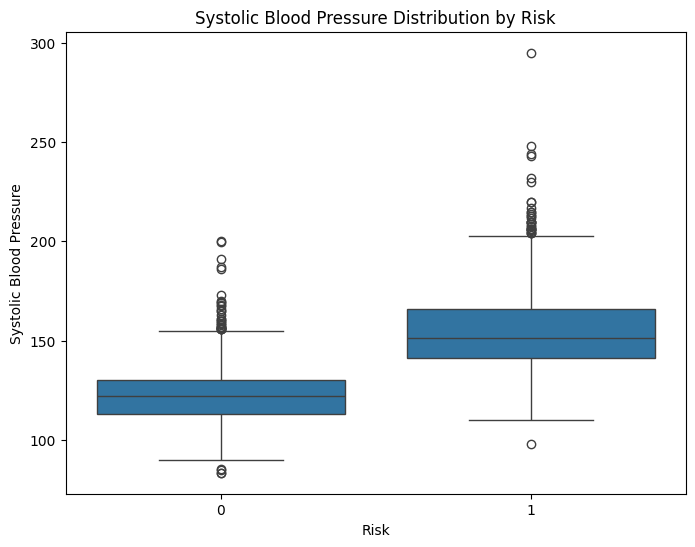

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Risk', y='sysBP', data=df)
plt.title('Systolic Blood Pressure Distribution by Risk')
plt.xlabel('Risk')
plt.ylabel('Systolic Blood Pressure')
plt.show()

<Axes: xlabel='age_cat', ylabel='cigsPerDay'>

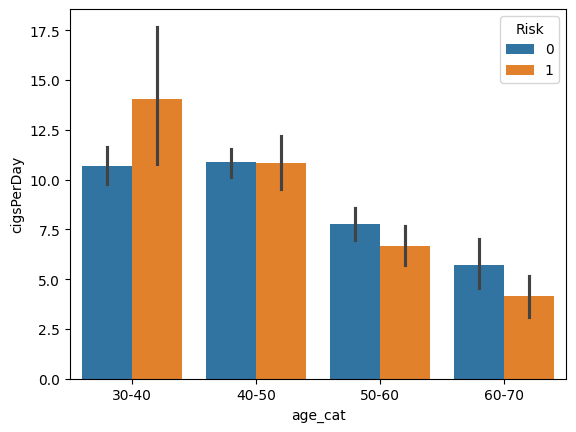

In [ ]:
import seaborn as sns
sns.barplot(df,x="age_cat",y="cigsPerDay",hue="Risk")

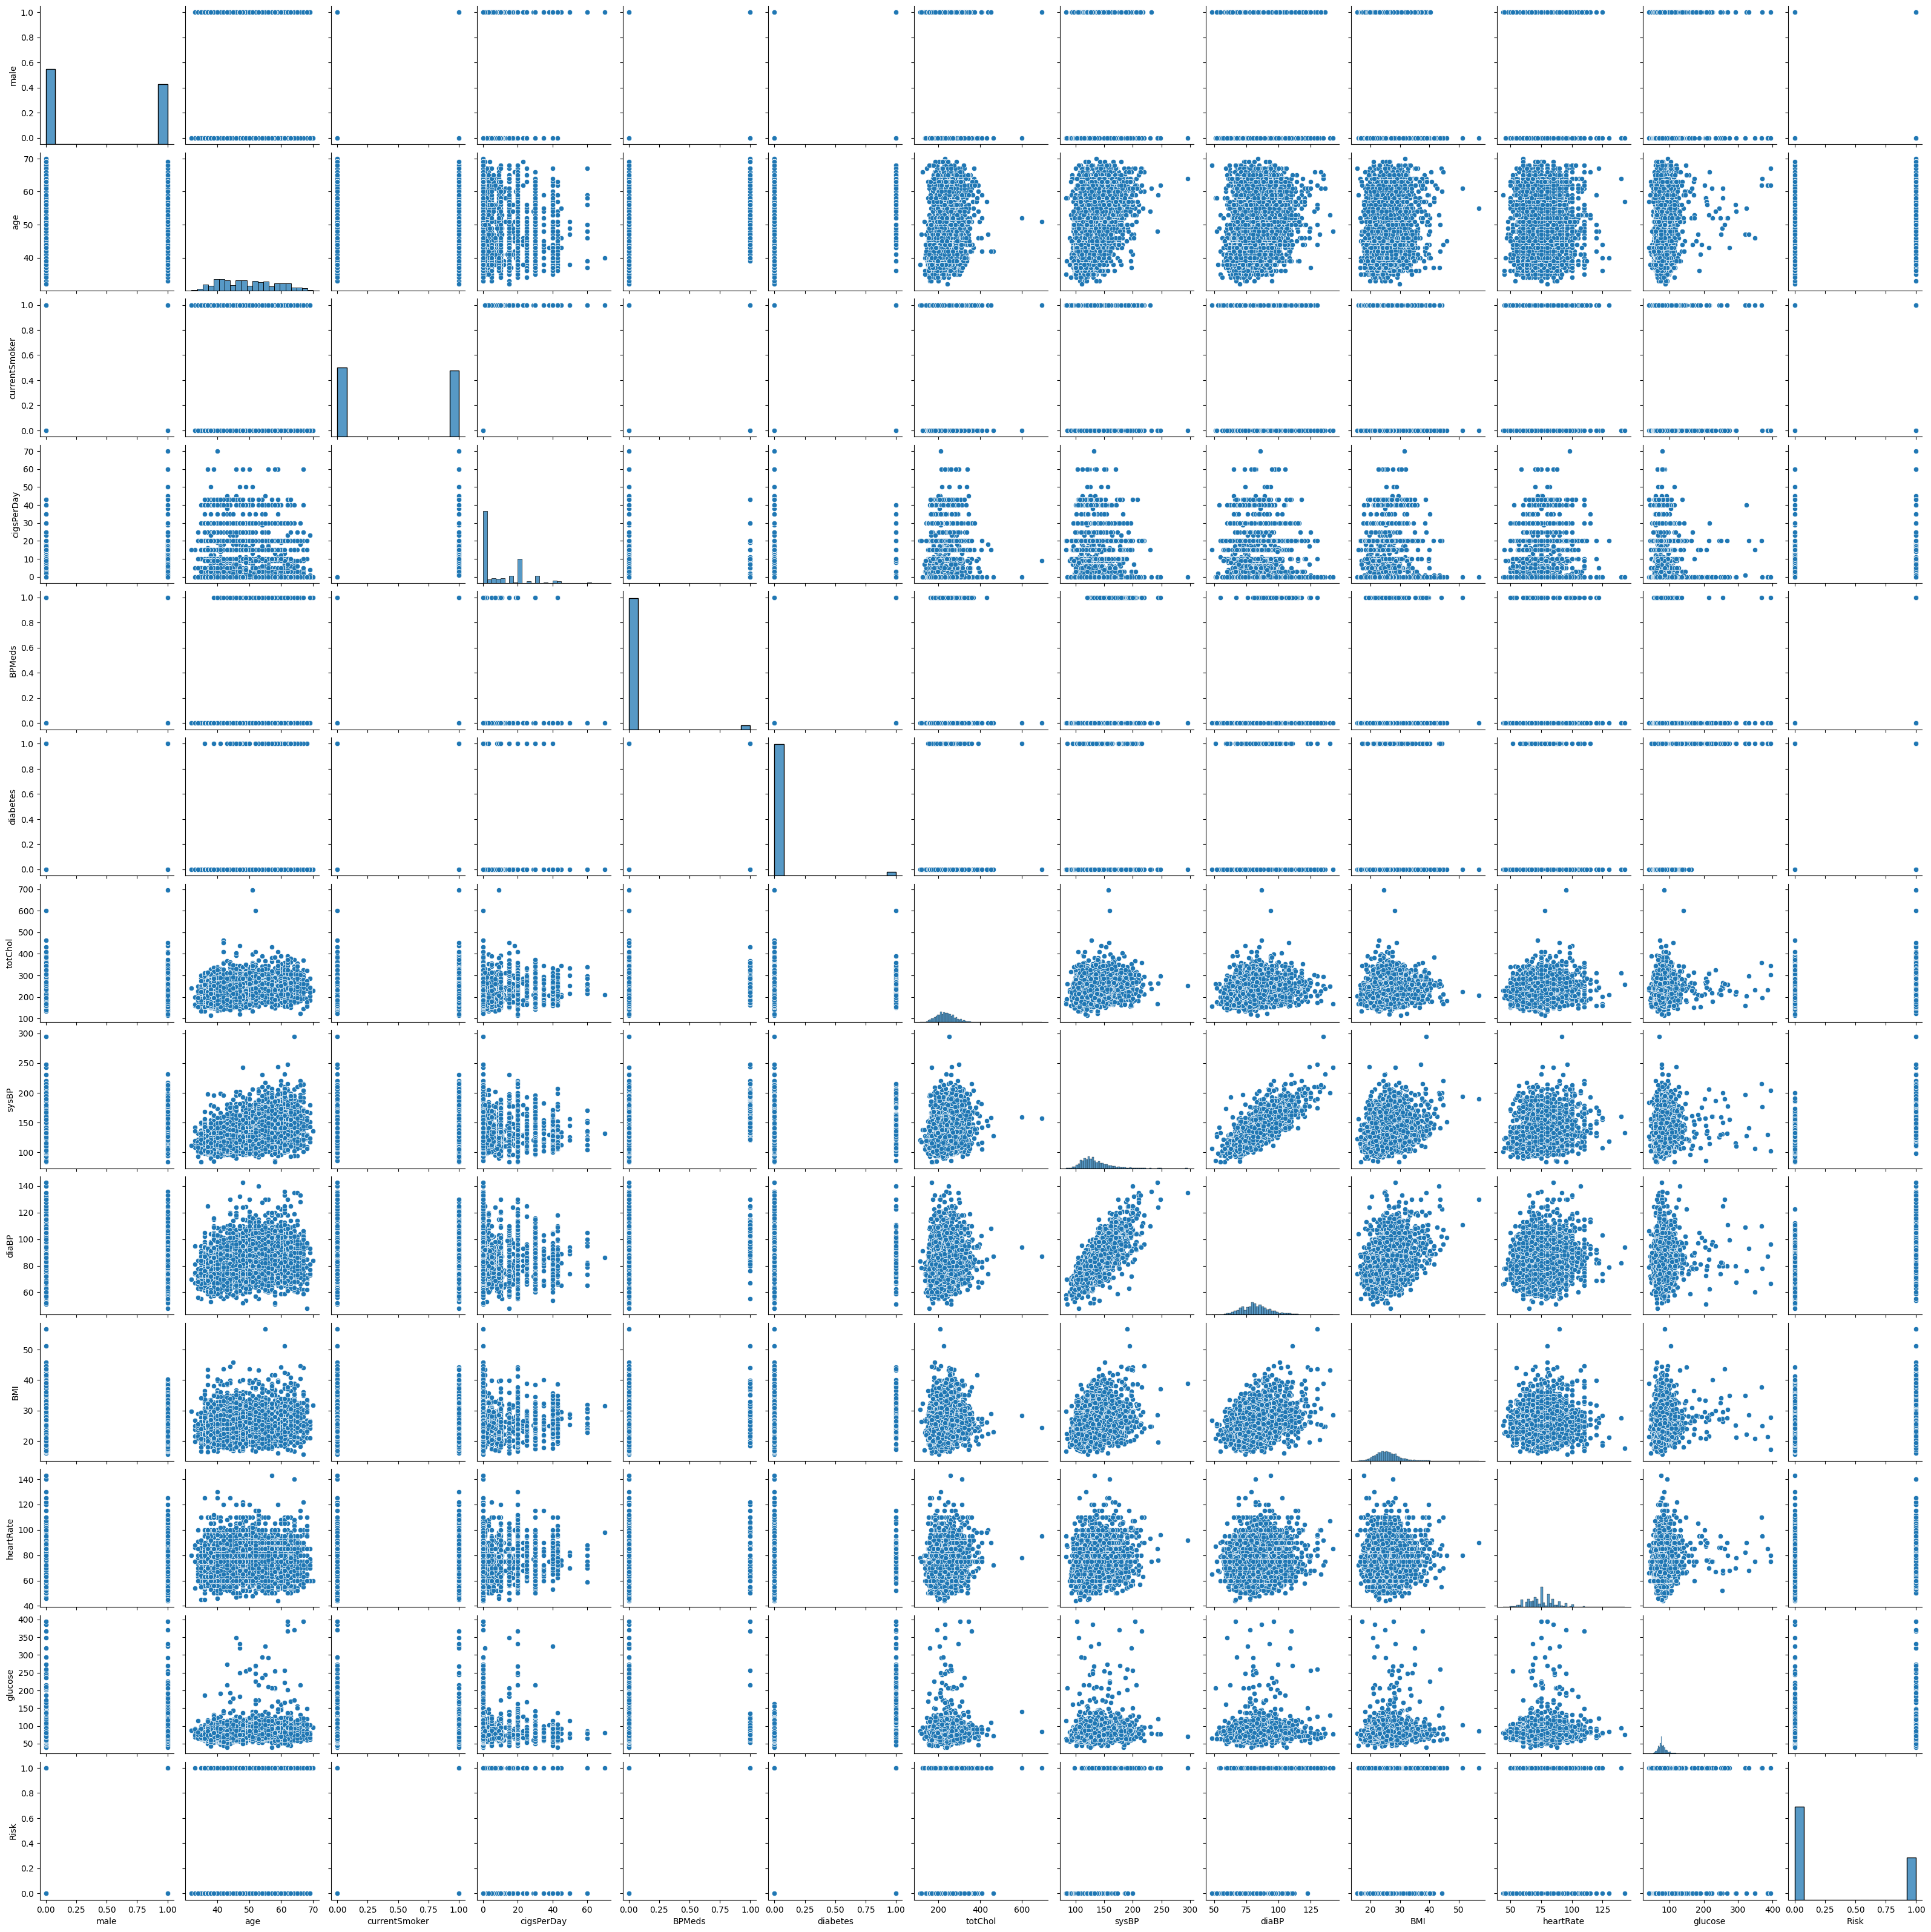

In [ ]:
sns.pairplot(df)

In [ ]:
pd.crosstab(df['Risk'],df['age_cat'])

age_cat,30-40,40-50,50-60,60-70
Risk,,,,
0,581,1083,679,238
1,81,346,465,278


<Axes: xlabel='age_cat'>

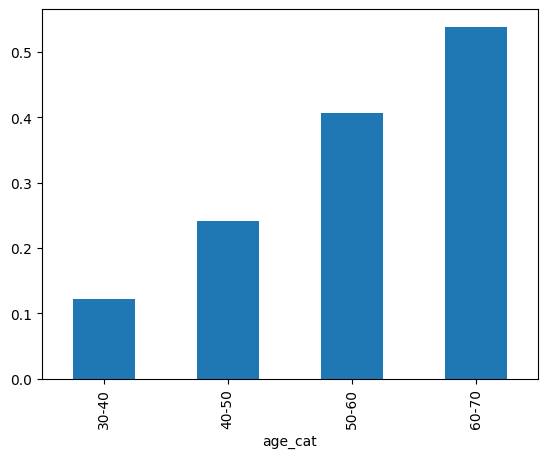

In [ ]:
df.groupby(['age_cat'])['Risk'].mean().plot.bar()

In [ ]:
df.head()

,male,age,currentSmoker,cigsPerDay,BPMeds,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,Risk,age_cat
0,1,39,0,0.0,0.0,0,195.0,106.0,70.0,26.97,80.0,77.0,0,30-40
1,0,46,0,0.0,0.0,0,250.0,121.0,81.0,28.73,95.0,76.0,0,40-50
2,1,48,1,20.0,0.0,0,245.0,127.5,80.0,25.34,75.0,70.0,0,40-50
3,0,61,1,30.0,0.0,0,225.0,150.0,95.0,28.58,65.0,103.0,1,60-70
4,0,46,1,23.0,0.0,0,285.0,130.0,84.0,23.10,85.0,85.0,0,40-50


<Axes: xlabel='totChol', ylabel='Count'>

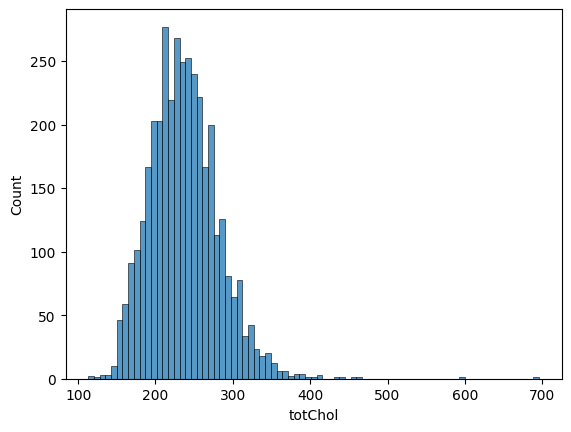

In [ ]:
sns.histplot(x='totChol',data=df)

In [ ]:
df['totChol'].skew()

0.9127142522827999

In [ ]:
df.groupby(['Risk'])['totChol'].median()

Risk
0    229.0
1    245.0
Name: totChol, dtype: float64

In [ ]:
#anova
from scipy.stats import f_oneway
f_oneway(df[df['Risk']==0]['totChol'],df[df['Risk']==1]['totChol'])

F_onewayResult(statistic=104.45989511762004, pvalue=3.3222377850814386e-24)

In [ ]:
#H0:no effect
#H1:effect correct

In [ ]:
chi2_contingency(pd.crosstab(df['age_cat'],df['Risk']))[1]

6.780016832382811e-68

<Axes: xlabel='Risk', ylabel='age'>

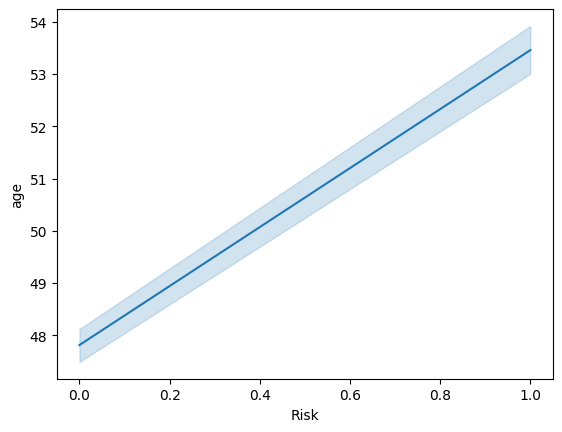

In [ ]:
import seaborn as sns
sns.lineplot(x='Risk',y='age',data=df)

<Axes: xlabel='Risk', ylabel='totChol'>

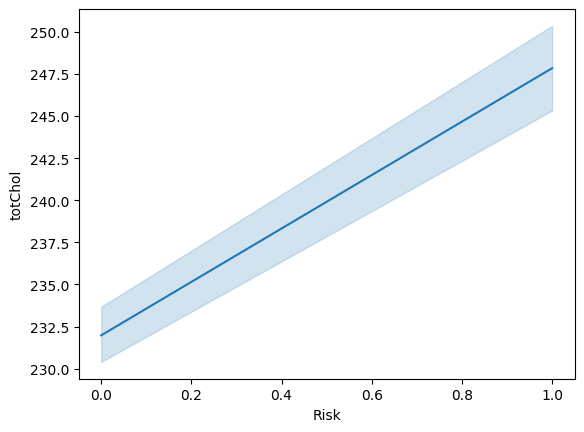

In [ ]:
sns.lineplot(x='Risk',y='totChol',data=df)

In [ ]:
x = df.drop(['Risk'],axis=1)
y = df['Risk']

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
svm_classifier = SVC(kernel='rbf', class_weight='balanced', random_state=42,probability=True)
svm_classifier.fit(x_train, y_train)
y_pred_svm = svm_classifier.predict(x_test)
print(classification_report(y_test, y_pred_svm))


              precision    recall  f1-score   support

           0       0.86      0.91      0.88       150
           1       0.91      0.86      0.89       169

    accuracy                           0.88       319
   macro avg       0.88      0.89      0.88       319
weighted avg       0.89      0.88      0.88       319



In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
rf_classifier = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
rf_classifier.fit(x_train, y_train)
y_pred_rf = rf_classifier.predict(x_test)
print(classification_report(y_test, y_pred_rf))


              precision    recall  f1-score   support

           0       0.91      0.91      0.91       150
           1       0.92      0.92      0.92       169

    accuracy                           0.92       319
   macro avg       0.91      0.92      0.92       319
weighted avg       0.92      0.92      0.92       319



In [ ]:
from sklearn.feature_selection import RFE


In [ ]:
rfe=RFE(rf_classifier)
rfe.fit(x,y)



RFE(estimator=RandomForestClassifier(class_weight='balanced', random_state=42))

In [ ]:
cols = x.columns[rfe.get_support()]
cols

Index(['age', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate'], dtype='object')

In [ ]:
"""from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=30)
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)"""

In [ ]:
#CV scores
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import cross_val_score
cross_val_score(rf_classifier,x,y,cv=10,scoring='recall')

array([0.95      , 0.9       , 0.95      , 0.9375    , 0.8875    ,
       0.975     , 0.875     , 0.87341772, 0.84810127, 0.94936709])

In [ ]:
rf_classifier.predict_proba(x_test)[:,1]

array([0.87, 0.  , 0.99, 0.89, 0.01, 0.04, 0.82, 0.67, 0.81, 0.91, 0.9 ,
       0.68, 0.98, 0.07, 0.02, 0.04, 0.03, 0.91, 0.76, 0.82, 0.92, 0.15,
       0.02, 0.94, 0.72, 0.97, 0.2 , 0.65, 0.95, 0.87, 0.09, 0.1 , 0.23,
       0.03, 0.14, 0.98, 0.53, 0.06, 0.3 , 0.01, 0.22, 0.  , 0.09, 0.99,
       0.14, 0.89, 0.06, 0.91, 0.05, 0.92, 0.04, 0.98, 0.7 , 0.99, 0.  ,
       0.05, 0.75, 0.07, 0.08, 0.01, 0.04, 0.94, 0.19, 0.97, 0.05, 0.81,
       0.04, 0.01, 0.72, 0.81, 0.97, 0.84, 0.24, 0.99, 0.  , 0.02, 0.14,
       0.97, 0.03, 0.03, 0.72, 0.15, 0.53, 0.09, 0.96, 0.  , 0.26, 0.14,
       0.23, 0.25, 0.05, 1.  , 0.26, 0.35, 0.12, 0.1 , 0.99, 0.05, 0.98,
       0.75, 0.02, 0.97, 0.02, 0.34, 0.05, 0.78, 0.07, 0.98, 0.93, 0.01,
       0.12, 0.44, 0.95, 0.8 , 0.02, 0.09, 0.8 , 0.4 , 0.98, 1.  , 0.91,
       0.32, 0.84, 0.9 , 0.99, 0.01, 0.  , 0.8 , 0.63, 0.  , 0.83, 0.95,
       0.93, 1.  , 0.91, 0.87, 0.01, 0.72, 0.08, 0.99, 0.99, 0.49, 0.97,
       0.7 , 0.78, 0.91, 1.  , 0.73, 0.18, 0.76, 0.

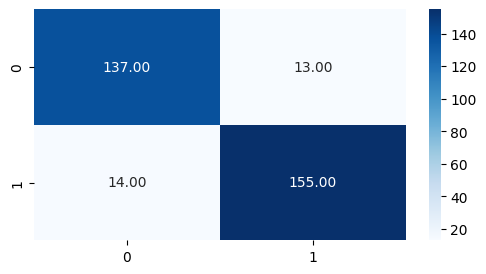

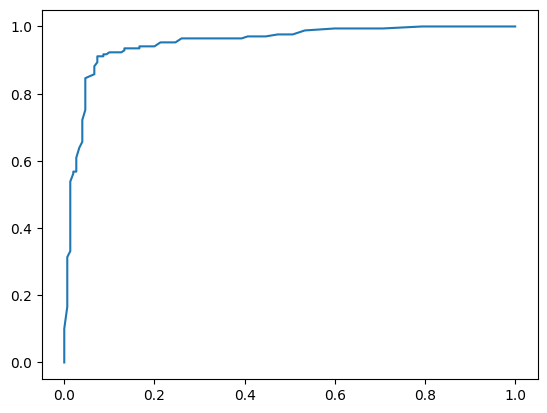

'precision 0.92 % recall 0.92 % roc_auc_score 0.92'

In [ ]:
from sklearn.metrics import precision_score,recall_score,roc_auc_score,roc_curve,confusion_matrix
import matplotlib.pyplot as plt
plt.figure(figsize=(6,3))
def model_evaluation(model):
  model.fit(x_train,y_train)
  y_pred = model.predict(x_test)
  precision = precision_score(y_test,y_pred)
  recall = recall_score(y_test,y_pred)
  roc_auc = roc_auc_score(y_test,y_pred)
  cm = confusion_matrix(y_test,y_pred)
  sns.heatmap(cm,annot=True,cmap='Blues',fmt='.2f')
  plt.show()
  y_prob = model.predict_proba(x_test)
  fpr,tpr,_ = roc_curve(y_test,y_prob[:,1])
  plt.plot(fpr,tpr)
  plt.show()
  return f'precision {round(precision,2)} % recall {round(recall,2)} % roc_auc_score {round(roc_auc,2)}'

model_evaluation(rf_classifier)

#Pycaret

In [ ]:
!pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.1/486.1 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 9.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 31.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.5/160.5 kB 17.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.0/258.0 kB 26.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 11.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 26.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 15.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.7/80.7 kB 12.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.8/21.8 MB 57.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 

In [ ]:
df.head(2)

,male,age,currentSmoker,cigsPerDay,BPMeds,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,Risk
0,0,64,0,0.0,0.0,0,300.0,144.0,80.0,25.81,75.0,102.0,1
1,1,49,1,40.0,0.0,0,260.0,142.0,54.0,25.40,67.0,95.0,1


In [ ]:
from pycaret.classification import *

In [ ]:
exp = setup(data=df,target='Risk')

,Description,Value
0,Session id,2023
1,Target,Risk
2,Target type,Binary
3,Original data shape,"(1594, 13)"
4,Transformed data shape,"(1594, 13)"
5,Transformed train set shape,"(1115, 13)"
6,Transformed test set shape,"(479, 13)"
7,Numeric features,12
8,Preprocess,True
9,Imputation type,simple


In [ ]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.8986,0.9475,0.8994,0.8981,0.8984,0.7972,0.7978,0.2780
gbc,Gradient Boosting Classifier,0.8852,0.9414,0.8797,0.8900,0.8845,0.7704,0.7711,0.3180
lightgbm,Light Gradient Boosting Machine,0.8807,0.9393,0.8761,0.8853,0.8798,0.7614,0.7629,0.9720
ridge,Ridge Classifier,0.8789,0.9431,0.8780,0.8805,0.8784,0.7578,0.7592,0.0370
lda,Linear Discriminant Analysis,0.8789,0.9431,0.8780,0.8805,0.8784,0.7578,0.7592,0.0320
lr,Logistic Regression,0.8771,0.9433,0.8798,0.8758,0.8771,0.7542,0.7553,0.9160
et,Extra Trees Classifier,0.8771,0.9420,0.8798,0.8760,0.8772,0.7542,0.7554,0.2250
nb,Naive Bayes,0.8744,0.9426,0.8762,0.8736,0.8743,0.7489,0.7499,0.0350
xgboost,Extreme Gradient Boosting,0.8744,0.9336,0.8761,0.8743,0.8745,0.7488,0.7500,0.1740
ada,Ada Boost Classifier,0.8726,0.9345,0.8546,0.8863,0.8698,0.7452,0.7463,0.1940


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       monotonic_cst=None, n_estimators=100, n_jobs=-1,
                       oob_score=False, random_state=2023, verbose=0,
                       warm_start=False)